Copyright IBM Corp. 2023

This will generate Figure 3 in Osogami et al. (2022).

> Takayuki Osogami, Segev Wasserkrug, Elisheva S. Shamash, "Mechanism Learning for Trading Networks", arXiv:2208.09222, 2022

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pathlib

reduce_variables = False
CB = True

path_name = "../exp/log/random_groves_learn"
fig_path_name = "../exp/fig/random_groves_learn"

if reduce_variables:
    path_name += "_reduced"
    fig_path_name += "_reduced"
if CB:
    path_name += "_CB"
    fig_path_name += "_CB"

path = pathlib.Path(path_name)
path = path.joinpath("10000_1024_1.csv")

fig_path_name += "_histogram"
fig_path = pathlib.Path(fig_path_name)
fig_path.mkdir(exist_ok=True, parents=True)    
    
df = pd.read_csv(path)

# total absolute payment to/from IP
df["learn_payment"] = df["learn_payment_S-H"].abs() + df["learn_payment_S-L"].abs() + df["learn_payment_B-H"].abs() + df["learn_payment_B-L"].abs()

len(df)

1642

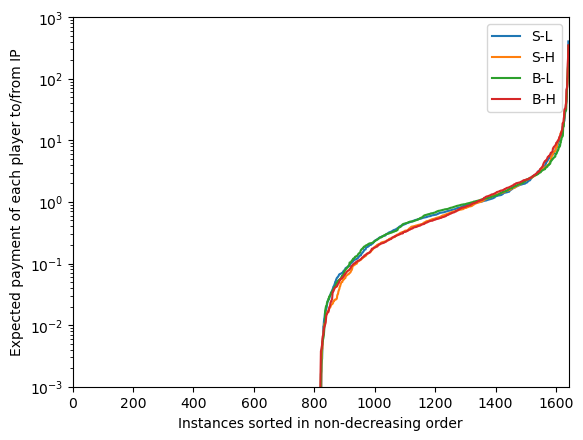

In [7]:
eps = 1e-9
metric = "comp_payment"
# for method in ["comp", "learn"]:
for method in ["comp"]:
    plt.figure()
    for player in [player for player in df.columns if metric in player]:
        if "IP" in player:
            continue
        x = df[player].abs().to_numpy()
        x = np.maximum(x, eps)
        plt.semilogy(sorted(x), label=player.strip(metric))
    plt.xlim([0, len(x)])
    plt.ylim([1e-3, 1e+3])
    plt.legend()
    plt.xlabel("Instances sorted in non-decreasing order")
    plt.ylabel("Expected payment of each player to/from IP")
    filename = method + "_payment_cumulative"
    filename += ".pdf"
    plt.savefig(fig_path.joinpath(filename), bbox_inches='tight')